In [1]:
!cat ../resources/supplys/*.txt > ../resources/dataset.csv

In [25]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../resources/dataset.csv", names=["supply", "finish_turn", "is_finish"])

In [4]:
# finish_turn = Noneの行があったので、それは除く
df = df[df["finish_turn"] != "None"]

In [5]:
df

,supply,finish_turn,is_finish
0,forge mountebank embassy emporium patron patri...,16.5,False
1,royal-carriage save hunting-lodge way-of-the-h...,15.5,True
2,sauna vampire livery fleet outpost village jes...,12.5,False
3,paddock acting-troupe duchess merchant-ship ho...,14.5,False
4,warehouse cursed-village contraband courtier h...,12,False
...,...,...,...
3240,witch fairgrounds scrying-pool groom pearl-div...,19,False
3241,fortune-teller dungeon acting-troupe royal-bla...,11,False
3242,develop stampede star-chart oasis band-of-misf...,21,True
3243,museum herbalist crumbling-castle small-castle...,16.5,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3197 entries, 0 to 3244
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   supply       3197 non-null   object
 1   finish_turn  3197 non-null   object
 2   is_finish    3197 non-null   bool  
dtypes: bool(1), object(2)
memory usage: 78.1+ KB


In [7]:
# 終了ターンをfloatにcast
df["finish_turn"] = df["finish_turn"].astype(float)

In [8]:
is_finish_df = df[df["is_finish"] == True]
is_not_finish_df = df[df["is_finish"] == False]

# is_finish

In [9]:
# ゲーム終了判定されたものの数
print(f'is finish: {len(is_finish_df)}')
print(f'is not finish: {len(is_not_finish_df)}')

is finish: 775
is not finish: 2422


# finish_turn

In [10]:
# 平均終了ターン
print(f'is finish: {is_finish_df["finish_turn"].mean()}')
print(f'is not finish: {is_not_finish_df["finish_turn"].mean()}')

is finish: 15.273548387096774
is not finish: 13.623245251857968


<AxesSubplot:xlabel='finish_turn', ylabel='Density'>

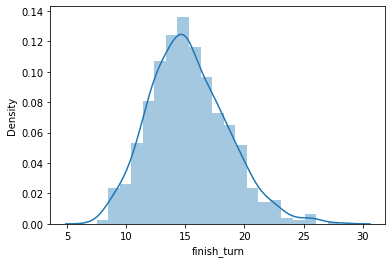

In [11]:
# ゲーム終了ターンのヒストグラム
sns.distplot(is_finish_df["finish_turn"])

<AxesSubplot:xlabel='finish_turn', ylabel='Density'>

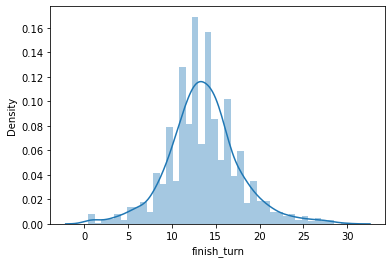

In [12]:
sns.distplot(is_not_finish_df["finish_turn"])

<AxesSubplot:xlabel='finish_turn', ylabel='Density'>

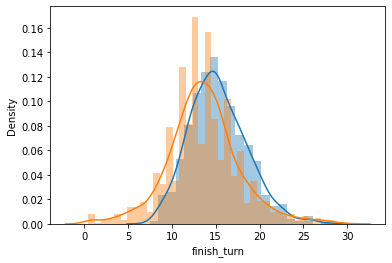

In [13]:
# 重ねる
sns.distplot(is_finish_df["finish_turn"])
sns.distplot(is_not_finish_df["finish_turn"])

終了判定されなかった(ユーザが投了した)ゲームは3T以下の終わることが考えづらい部分も値が入ってそう。  
以下のようなケースが考えられる

- ゲーム開始後、相手が操作しないので投了にした
- 嫌いなカードがあった
- 5-2と4-3の格差が大きいときに裏目を引いた

これらのゲームはモデリングの際は除いて良さそう

In [14]:
# 上記のようなケースを除く。そしてそのときの平均
is_not_finish_df = is_not_finish_df[is_not_finish_df["finish_turn"] >= 3]
print(f'is not finish: {is_not_finish_df["finish_turn"].mean()}')

is not finish: 13.731986672219909


# supply

In [15]:
# supplyで頻出するカードを見る
from collections import Counter

card_cnt = Counter()

for supply in is_finish_df["supply"].values:
    for card_name in supply.split(" "):
        card_cnt[card_name] += 1

In [16]:
top50 = card_cnt.most_common()[:50]
top50

[('horse', 261),
 ('overgrown-estate', 68),
 ('necropolis', 68),
 ('hovel', 68),
 ('platinum', 55),
 ('camel-train', 54),
 ('fisherman', 50),
 ('animal-fair', 49),
 ('destrier', 48),
 ('wish', 45),
 ('cavalry', 44),
 ('sheepdog', 43),
 ('paddock', 43),
 ('captain', 40),
 ('groom', 39),
 ('livery', 38),
 ('goatherd', 38),
 ('black-cat', 37),
 ('colony', 36),
 ('hostelry', 36),
 ('peddler', 36),
 ('border-village', 36),
 ('wayfarer', 35),
 ('council-room', 35),
 ('oasis', 35),
 ('displace', 35),
 ('stockpile', 35),
 ('horn-of-plenty', 34),
 ('charm', 34),
 ('counterfeit', 34),
 ('barge', 34),
 ('supplies', 34),
 ('goat', 33),
 ('pixie', 33),
 ('rats', 33),
 ('beggar', 33),
 ('hermit', 33),
 ('jester', 33),
 ('workers-village', 33),
 ('bard', 32),
 ('forager', 32),
 ('falconer', 31),
 ('embargo', 31),
 ('scepter', 31),
 ('stonemason', 31),
 ('village-green', 31),
 ('mill', 31),
 ('snowy-village', 31),
 ('tunnel', 30),
 ('lackeys', 30)]

In [17]:
bottom50 = card_cnt.most_common()[::-1][:50]
bottom50

# 支配が1件しか出現してない... みんな嫌いなのかな

[('card-of-the-mouse', 1),
 ('possession', 1),
 ('pig', 1),
 ('card-of-the-horse', 2),
 ('training', 3),
 ('bandit-fort', 5),
 ('urchin', 5),
 ('mercenary', 5),
 ('road-network', 6),
 ('seaway', 6),
 ('wall', 6),
 ('inheritance', 6),
 ('way-of-the-monkey', 7),
 ('annex', 7),
 ('donate', 7),
 ('card-of-the-mule', 7),
 ('banquet', 7),
 ('way-of-the-ox', 8),
 ('keep', 8),
 ('horn', 8),
 ('lantern', 8),
 ('border-guard', 8),
 ('guildhall', 8),
 ('invest', 8),
 ('way-of-the-frog', 8),
 ('museum', 8),
 ('way-of-the-camel', 8),
 ('wedding', 8),
 ('summon', 8),
 ('exploration', 8),
 ('cathedral', 8),
 ('quest', 8),
 ('tax', 8),
 ('save', 8),
 ('goons', 9),
 ('arena', 9),
 ('capitalism', 9),
 ('pilgrimage', 9),
 ('trade', 9),
 ('tomb', 9),
 ('tournament', 9),
 ('princess', 9),
 ('bag-of-gold', 9),
 ('followers', 9),
 ('trusty-steed', 9),
 ('diadem', 9),
 ('ferry', 9),
 ('windfall', 9),
 ('pageant', 9),
 ('expedition', 9)]

"避難所"や"願い"を除くのを忘れていた...  
以下のデータはクリーニング

- 避難所
- 願い
- 家宝
- splitカードの片割れ
- 騎士
- 城
- トラベラー(騎士見習い、農民)
- pig (女魔術師？)
- card-of-the-hoge (wayを取るときのバグっぽい)
- ゾンビ(ネクロマンサー)
- コウモリ

In [18]:
# 正規終了しなかったゲームでも
# supplyで頻出するカードを見る
from collections import Counter

card_cnt = Counter()

for supply in is_not_finish_df["supply"].values:
    for card_name in supply.split(" "):
        card_cnt[card_name] += 1

In [19]:
top50 = card_cnt.most_common()[:50]
top50

[('horse', 788),
 ('overgrown-estate', 231),
 ('necropolis', 231),
 ('hovel', 231),
 ('platinum', 157),
 ('colony', 156),
 ('wish', 145),
 ('cavalry', 142),
 ('stockpile', 131),
 ('destrier', 123),
 ('paddock', 120),
 ('sheepdog', 118),
 ('scrap', 116),
 ('gatekeeper', 112),
 ('captain', 111),
 ('hostelry', 110),
 ('cardinal', 110),
 ('animal-fair', 110),
 ('sleigh', 108),
 ('hunting-lodge', 108),
 ('supplies', 107),
 ('barge', 107),
 ('displace', 106),
 ('bounty-hunter', 105),
 ('kiln', 105),
 ('camel-train', 105),
 ('peddler', 104),
 ('coven', 104),
 ('wayfarer', 103),
 ('goatherd', 103),
 ('village-green', 102),
 ('black-cat', 102),
 ('mastermind', 101),
 ('groom', 101),
 ('livery', 98),
 ('fisherman', 98),
 ('scepter', 96),
 ('falconer', 96),
 ('overlord', 94),
 ('snowy-village', 94),
 ('oracle', 93),
 ('patron', 91),
 ('rogue', 91),
 ('sanctuary', 91),
 ('stables', 86),
 ('fortune', 86),
 ('border-village', 85),
 ('expand', 85),
 ('city-quarter', 85),
 ('lost-city', 85)]

In [20]:
bottom50 = card_cnt.most_common()[::-1][:50]
bottom50

# 支配圧倒的に少ない
# それ以外はイベント・ランドマークが多い
# 詐欺師も出現している -> みんなbanしている？

[('card-of-the-camel', 2),
 ('card-of-the-squirrel', 3),
 ('card-of-the-frog', 4),
 ('card-of-the-goat', 4),
 ('card-of-the-seal', 4),
 ('card-of-the-rat', 5),
 ('card-of-the-mole', 6),
 ('card-of-the-horse', 10),
 ('possession', 11),
 ('card-of-the-worm', 11),
 ('card-of-the-pig', 11),
 ('card-of-the-sheep', 11),
 ('card-of-the-owl', 11),
 ('card-of-the-chameleon', 12),
 ('card-of-the-ox', 13),
 ('card-of-the-monkey', 16),
 ('card-of-the-otter', 17),
 ('card-of-the-mouse', 19),
 ('pig', 19),
 ('keep', 24),
 ('bandit-fort', 24),
 ('wall', 25),
 ('ritual', 25),
 ('march', 25),
 ('triumphal-arch', 25),
 ('exploration', 26),
 ('pageant', 26),
 ('academy', 26),
 ('tax', 26),
 ('palace', 27),
 ('delve', 27),
 ('donate', 28),
 ('reap', 28),
 ('trade', 29),
 ('mission', 29),
 ('aqueduct', 29),
 ('wolf-den', 29),
 ('swindler', 29),
 ('alms', 29),
 ('silos', 29),
 ('mountain-pass', 30),
 ('crop-rotation', 30),
 ('pilgrimage', 30),
 ('star-chart', 30),
 ('barracks', 30),
 ('quest', 31),
 ('inher

# supply x finish_turn

In [24]:
# 終了ターンが早いゲームのサプライを見てみる
pd.set_option("display.max_colwidth", 200)  # 省略しない
is_finish_df.sort_values('finish_turn').head(10)

,supply,finish_turn,is_finish
2833,procession horse livery animal-fair way-of-the-pig hostelry hermit farmers-market captain crossroads magpie enhance cache coven,7.5,True
2979,duplicate lackeys horse cellar triumph way-of-the-ox trading-post library steward groom goatherd wayfarer mastermind,8.0,True
2239,duplicate academy prince mandarin inventor scrying-pool merchant-guild platinum sculptor colony way-of-the-mole contraband workers-village lackeys,8.5,True
246,advance pirate-ship cobbler sleigh villa wayfarer animal-fair death-cart horse artificer seer baron windfall,8.5,True
2932,border-village enhance harvest salvager caravan livery trade-route horse forum highway cathedral port death-cart stonemason,8.5,True
372,jester border-village academy stonemason ghost-town scheme scrap experiment margrave bat advance lost-city vampire horse,8.5,True
1147,fortress philosophers-stone hermit noble-brigand horse bargain quarry counting-house council-room fools-gold groundskeeper vineyard ride,9.0,True
2960,loan tower jester pixie ironworks city-quarter gardens rabble colonnade inventor goat stonemason cartographer magpie,9.0,True
2844,counterfeit tax overgrown-estate tracker pirate-ship pouch hunting-grounds bishop lost-arts cobbler scheme hovel lurker lighthouse necropolis courtyard,9.0,True
2117,young-witch bounty-hunter fisherman bargain wayfarer leprechaun pearl-diver stockpile gamble ambassador horse hermit border-village wish contraband,9.0,True


- 最短のゲームは「行進-馬」なので納得...
- 2番目に短いゲームは「mastermind」と「groom」が暴れた？
- それ以外のゲームも、基本山が枯れるカード(発明家、ヴィラ、石工、大学など)が入ってそう？

In [26]:
# 終了ターンが早いゲームのサプライを見てみる
is_finish_df.sort_values('finish_turn', ascending=False).head(10)

,supply,finish_turn,is_finish
2271,pasture herbalist cultist ironmonger overgrown-estate scavenger canal shepherd march skulk hovel squire necropolis throne-room contraband fishing-village,28.0,True
114,sir-destry sir-vander forager dame-anna native-village dame-sylvia sir-michael dame-josephine necropolis priest overgrown-estate capital kiln way-of-the-worm knights upgrade sir-martin hovel candl...,26.0,True
2314,swashbuckler humble-castle sprawling-castle cache castles council-room kings-castle horse-traders small-castle conquest crumbling-castle bank opulent-castle wedding haunted-castle capital artifice...,26.0,True
2769,island mint poacher horse lost-in-the-woods trade-route swamp-hag border-village fool platinum soothsayer way-of-the-goat hostelry wolf-den marauder lucky-coin,26.0,True
1826,vineyard upgrade platinum marauder colony treasury jester rabble workshop cellar coven night-watchman,25.5,True
1207,overgrown-estate charm merchant-guild monument necropolis exploration toil courtyard coven market-square inn hovel contraband bandit-camp coin-of-the-realm,25.5,True
642,sir-destry sir-bailey dame-molly mint sir-martin priest fleet storyteller sir-michael dame-josephine dame-anna dame-natalie defiled-shrine forager old-witch pouch tracker caravan giant sir-vander ...,25.0,True
2810,ride crown dismantle camel-train scouting-party cavalry duke border-village festival royal-seal horse miser church walled-village,24.5,True
2401,animal-fair crumbling-castle kings-castle small-castle haunted-woods salt-the-earth castles vassal sculptor haunted-castle humble-castle opulent-castle ball sprawling-castle skulk mountain-village...,24.0,True
2178,temple raider way-of-the-horse cartographer vineyard conclave oasis farmers-market treasure-map festival summon venture,24.0,True


- 一番遅かったゲームは「狂信者」と「羊飼い」でグダグダゲームになった？
- 騎士が複数回登場している... やっぱり良くないカード
- 城も複数回登場している。城 vs. 属州 はロングゲームになりやすい